In [54]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

from sklearn.neural_network import MLPRegressor

In [56]:
with open("training.pkl", "rb") as f:
    df = pickle.load(f)

In [57]:
x = df[['x_pos', 'y_pos', 'x_vec', 'y_vec', 'x_dest', 'y_dest']].to_numpy()
y = df[['x_tar', 'y_tar']].to_numpy()

In [58]:
#clf = MLPRegressor(verbose=True, hidden_layer_sizes=(50,50), max_iter=100).fit(x,y)

In [23]:
# with open('model.pkl', 'wb') as f:
#     pickle.dump(clf, f)

In [59]:
with open('model.pkl', 'rb') as f:
    clf = pickle.load(f)

In [60]:
def simulate(clf, input, iterations):
    for i in range(iterations):
        output = clf.predict([input[i]])
        next = [output[0][0]+input[i][0], output[0][1]+input[i][1], output[0][0], output[0][1], input[i][-2], input[i][-1]]
        input.append(next)
    return np.array(input)

In [61]:
input = [[580*2, 50*2, 0, 0, 550*2, 250*2]] # example input
sim = simulate(clf, input, 10000)

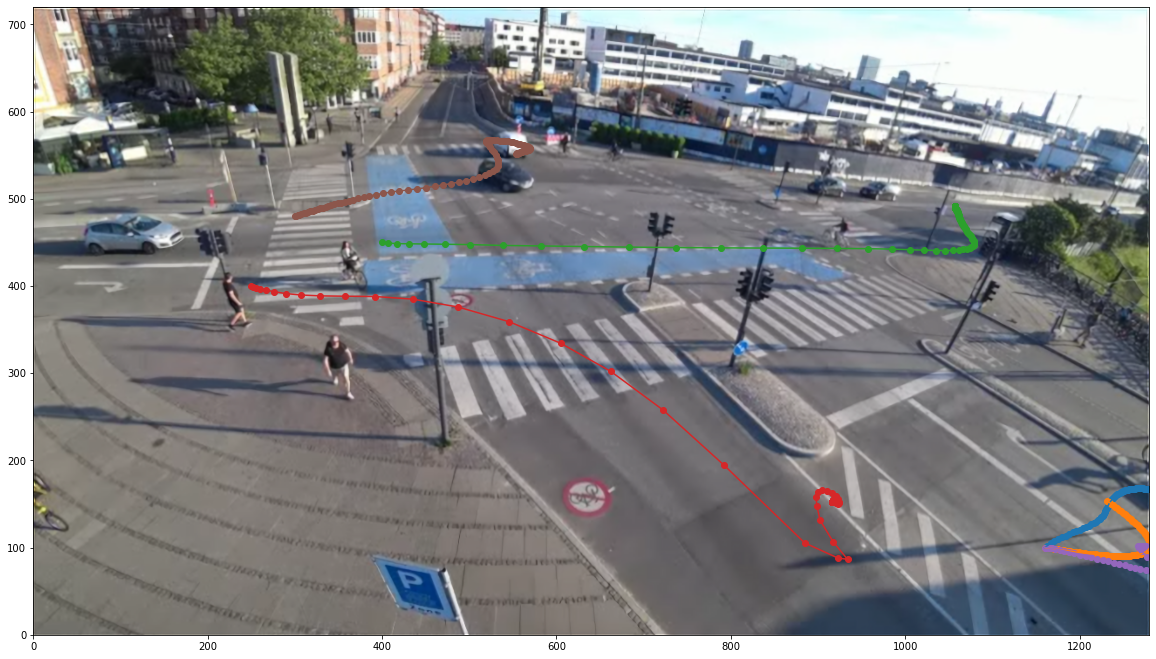

In [62]:
tis = [[[580*2, 50*2, 0, 0, 550*2, 250*2]],
        [[580*2, 50*2, 0, 0, 250*2, 280*2]],
        [[200*2, 225*2, 0, 0, 500*2, 250*2]],
        [[125*2, 200*2, 0, 0, 460*2, 50*2]],
        [[580*2, 50*2, 0, 0, 250*2, 300*2]],
        [[150*2, 240*2, 0, 0, 250*2, 300*2]]]

fig, ax = plt.subplots(figsize=(20,20))
im = Image.open("intersection2.png")
im = ImageOps.flip(im)
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
ax.imshow(im, origin='lower')
sims = []
for n in tis:
    sim = simulate(clf, n, 100)
    sims.append(sim)
    ax.plot(sim[:,:1], sim[:,1:2])
    ax.scatter(sim[:,:1], sim[:,1:2])
sims = np.array(sims)

In [29]:
with open('bsc-3m/signals.pickle', 'rb') as f:
    li = pickle.load(f)
    
with open('bsc-3m/signal_lines_true.pickle', 'rb') as f:
    asd = pickle.load(f)

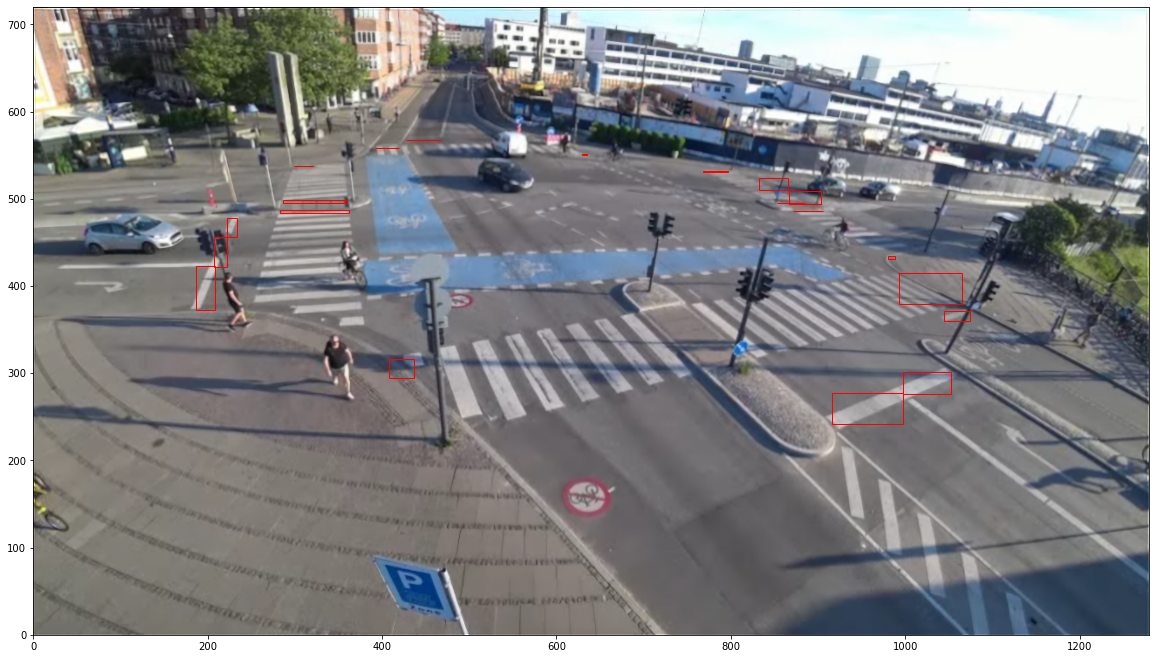

In [74]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(20,20))
im = Image.open("intersection2.png")
im = ImageOps.flip(im)
ax.set_xlim(0, 1280)
ax.set_ylim(0,720)
ax.imshow(im, origin='lower')

# Create a Rectangle patch
for ind in range(20):
    w = asd[ind]['x'][1] - asd[ind]['x'][0]
    h = asd[ind]['y'][1] - asd[ind]['y'][0]
    rect = patches.Rectangle((asd[ind]['x'][0], asd[ind]['y'][0]), w, h, linewidth=1, edgecolor='r', facecolor='none', fill=True)

    # Add the patch to the Axes
    ax.add_patch(rect)

MovieWriter ffmpeg unavailable; using Pillow instead.


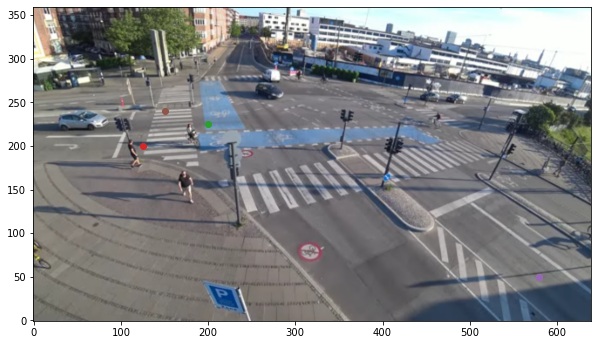

In [17]:
from matplotlib.animation import FuncAnimation

# asd = sims[:,:i,:2].reshape((-1,2)) / 2

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(im, origin='lower')


k = [ax.scatter([], [], alpha=1) for _ in range(len(sims))]


def animate(i):
    if i==0:
        for n in range(len(sims)):
            k[n].set_offsets([[0,0]])
    else:
        for n in range(len(sims)):
            asd = sims[n,:i,:2].reshape((-1,2))
            k[n].set_offsets(asd)
    return k

anim = FuncAnimation(
    fig, animate, interval=1, frames=400)#, blit=True)


anim.save('hej.gif')